
✅ Merged DataFrame:
        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  \
0   1 Review , 2 Followers  5/25/2019 15:54         0   
1  3 Reviews , 2 Followers  5/25/2019 14:20         0   
2  2 Reviews , 3 Followers  5/24/2019 22:54         0   
3    1 Review , 1 Follower  5/24/2019 22:11         0   
4  3 Reviews , 2 Followers  5/24/2019 21:37       

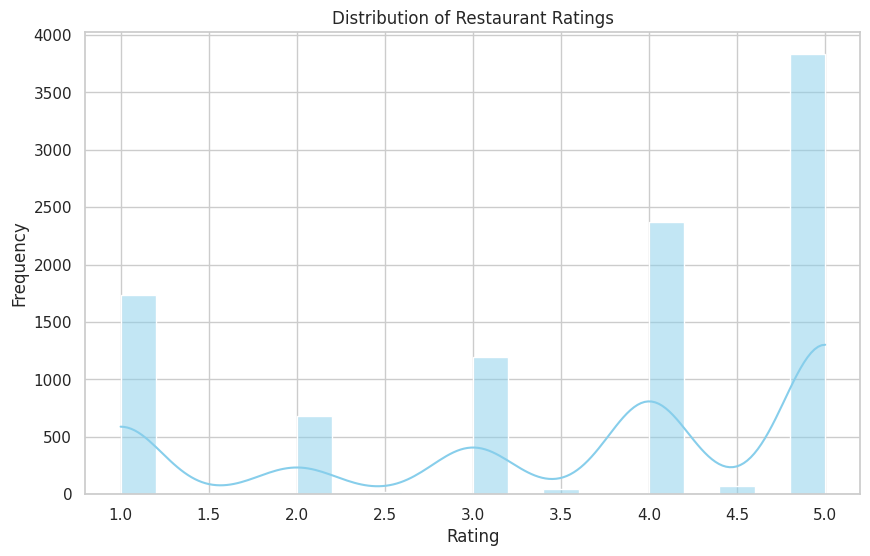

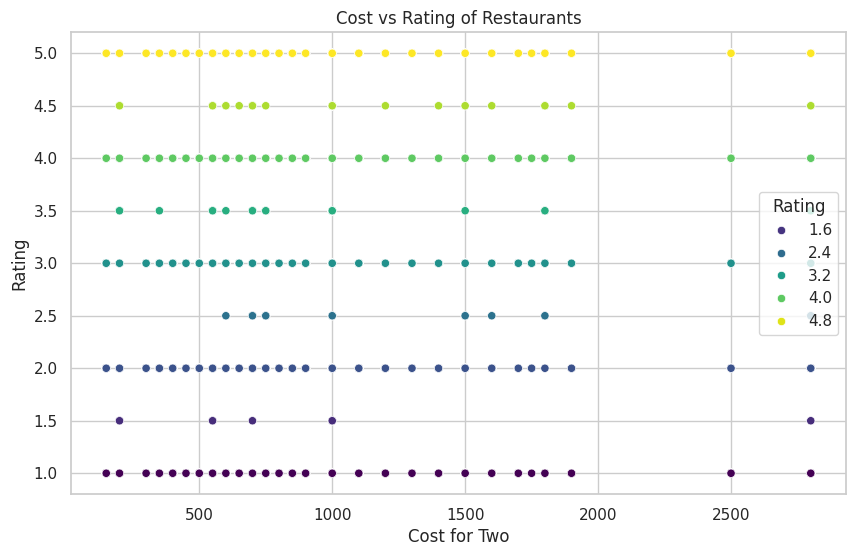

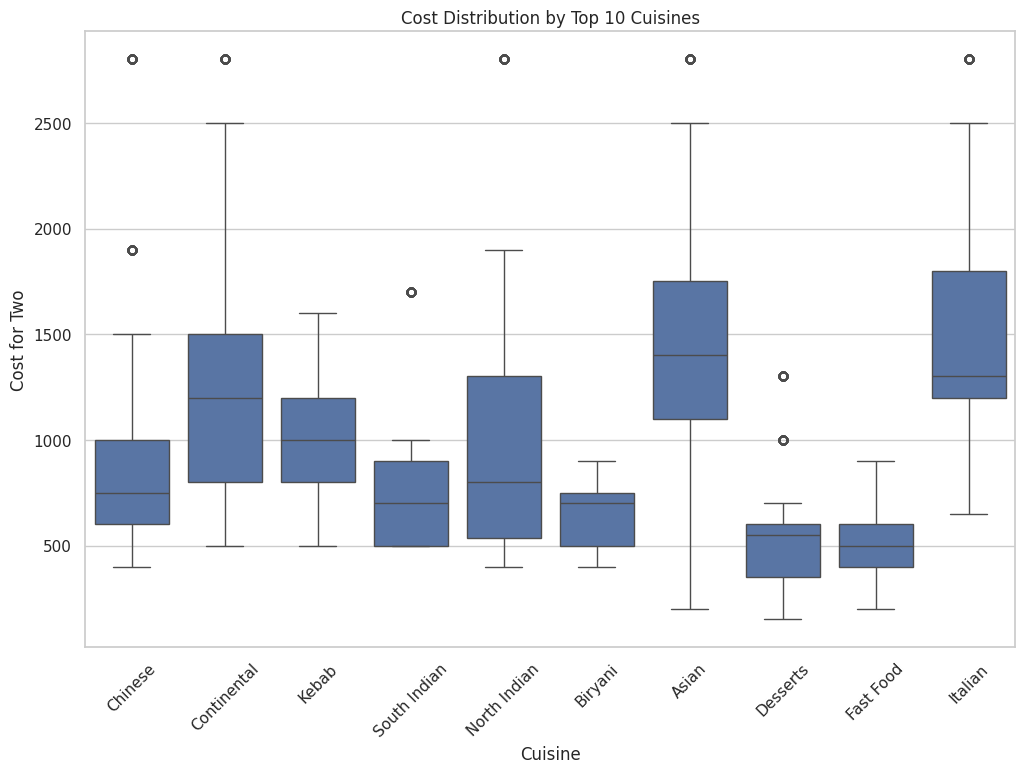

/tmp/ipython-input-17-2218733680.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_top_cuisines.index, y=avg_rating_top_cuisines.values, palette='coolwarm')


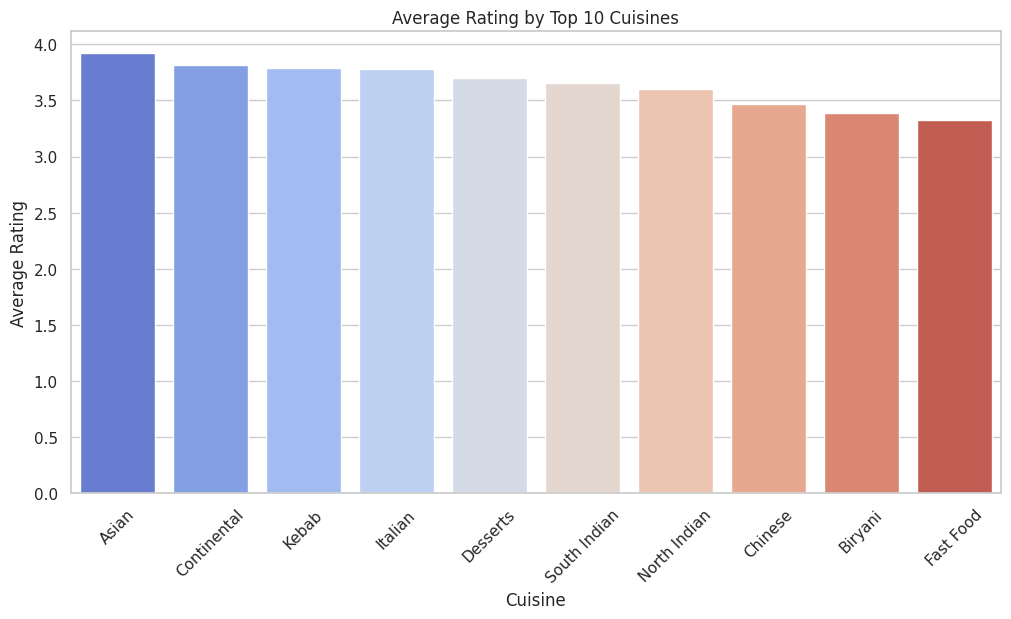

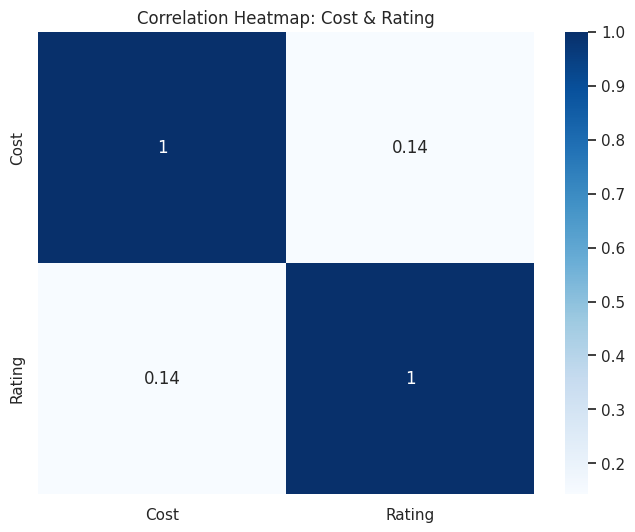


✅ All visualizations completed!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# -----------------------------------------------
# 📥 Load Data
# -----------------------------------------------

zomato_names_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')
zomato_reviews_df = pd.read_csv('Zomato Restaurant reviews.csv')

# -----------------------------------------------
# 🔗 Merge DataFrames
# -----------------------------------------------

zomato_names_df.rename(columns={'Name': 'Restaurant'}, inplace=True)
merged_df = pd.merge(zomato_reviews_df, zomato_names_df, on='Restaurant', how='left')

print("\n✅ Merged DataFrame:")
print(merged_df.head())

# -----------------------------------------------
# 💵 Clean 'Cost' column
# -----------------------------------------------

merged_df['Cost'] = merged_df['Cost'].str.replace(',', '', regex=False).astype(float)
print("\n✅ 'Cost' column cleaned:")
print(merged_df['Cost'].head())

# -----------------------------------------------
# ⭐ Clean 'Rating' column
# -----------------------------------------------

merged_df['Rating'] = merged_df['Rating'].replace('Like', '5.0')
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
merged_df.dropna(subset=['Rating'], inplace=True)

print("\n✅ 'Rating' column cleaned:")
print(merged_df['Rating'].head())

# -----------------------------------------------
# 🍽️ Explode Cuisines
# -----------------------------------------------

merged_df['Cuisines_List'] = merged_df['Cuisines'].str.split(', ').fillna('')
df_exploded = merged_df.explode('Cuisines_List')

# -----------------------------------------------
# 📊 Average Rating per Cuisine
# -----------------------------------------------

average_rating_per_cuisine = df_exploded.groupby('Cuisines_List')['Rating'].mean().sort_values(ascending=False)
print("\n✅ Average Rating per Cuisine:")
print(average_rating_per_cuisine.head())

# -----------------------------------------------
# 💾 Save cleaned data
# -----------------------------------------------

merged_df.to_csv('cleaned_zomato_data.csv', index=False)
print("\n✅ Cleaned data saved to 'cleaned_zomato_data.csv'")
print("\n✅ Data shape:", merged_df.shape)

# -----------------------------------------------
# 📈 VISUALIZATIONS (SEABORN)
# -----------------------------------------------

sns.set(style="whitegrid")

# 1️⃣ Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 2️⃣ Cost vs Rating Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Cost', y='Rating', hue='Rating', palette='viridis')
plt.title('Cost vs Rating of Restaurants')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.show()

# 3️⃣ Boxplot: Cost by Top 10 Cuisines
top_cuisines = df_exploded['Cuisines_List'].value_counts().head(10).index
df_top_cuisines = df_exploded[df_exploded['Cuisines_List'].isin(top_cuisines)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_cuisines, x='Cuisines_List', y='Cost')
plt.xticks(rotation=45)
plt.title('Cost Distribution by Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Cost for Two')
plt.show()

# 4️⃣ Average Rating by Top 10 Cuisines
avg_rating_top_cuisines = df_top_cuisines.groupby('Cuisines_List')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_top_cuisines.index, y=avg_rating_top_cuisines.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Rating by Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()

# 5️⃣ Correlation Heatmap
plt.figure(figsize=(8, 6))
numeric_cols = merged_df[['Cost', 'Rating']]
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap: Cost & Rating')
plt.show()

print("\n✅ All visualizations completed!")
